# Пример линейной регрессии на реальных данных

Рассмотрим реальны датасет содержащий данные о домах в Бостоне.


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

y = boston_dataset['target']
X = boston_dataset['data'][:, [5, -2]]


In [2]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

In [4]:
X_square, X_distance, y = get_new_data()
print_3d_table_with_data(X_square, X_distance, y)
plot_new_3d_data(X_square, X_distance, y)

    Площадь квартиры  Расстояние до центра  Цена квартиры
0                 40                    95      7400000.0
1                 27                    64      6600000.0
2                 47                    68     10200000.0
3                 20                    41      6400000.0
4                 42                    71      9200000.0
5                 56                    20     14400000.0
6                 54                    85     10700000.0
7                 33                    93      6000000.0
8                 44                    42     10700000.0
9                 74                    44     16900000.0
10                53                    50     12400000.0
11                33                    72      7500000.0
12                51                    29     13000000.0
13                58                    68     12200000.0
14                59                     3     16000000.0
15                20                    93      3500000.0
16            

A Jupyter Widget

In [27]:
def plot_loss_in_3d(X1, X2, y):    
    angles1 = IntSlider(min=0, max=180, step=1, value=0, description='Вертикальное')
    angles2 = IntSlider(min=0, max=180, step=1, value=0, description='Горизонтальное')

    @interact(angle1=angles1, angle2=angles2)
    def plot_loss(angle1, angle2):
        fig = plt.figure(figsize=(10, 5))
        ax = fig.gca(projection='3d')

        # Make data.
        X = np.linspace(-500000, 500000, 20)
        Y = np.linspace(-200000, 0, 20)
        X, Y = np.meshgrid(X, Y)

        Z = np.zeros_like(X)
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i, j] = J_full(5000000, X[i, j], Y[i, j], X1, X2, y)

        ax.set_xlabel('Площадь квартиры, квадратные метры')
        ax.set_ylabel('Растояние до центра Москвы, км')
        ax.set_zlabel('Цена квартиры, млн рублей')
        
        surf = ax.plot_surface(X, Y, Z,   linewidth=0, antialiased=False, cmap=cm.coolwarm)
        ax.view_init(angle1, angle2)
        plt.show()

plot_loss_in_3d(X_square, X_distance, y)

A Jupyter Widget

In [28]:
a=0.0001
k1, k2 = lin_grad_full(X_square, X_distance, y, alpha=a, iters=50, k0_init=5000000, k1_init=500000, k2_init=-200000)

A Jupyter Widget

In [29]:
plot_new_data_and_hyp(X_square, X_distance, y, 5000000, k1, k2)

A Jupyter Widget

Посмотрим на X и на y.

In [ ]:
print(X)

In [ ]:
print(X.shape)

In [ ]:
print(y)

In [ ]:
print(y)

X содержит две колонки. 

1. В первой колонке содержится среднее колличесво комнат в жилище.
2. Во второй колонке содержится процент населения с более низким статусом чем у жильца.

y - это медианая цена за дом с такими параметрами в 1000$

In [ ]:
def visualize_X(X):
    print(pd.DataFrame(X, columns=['Cреднее колличесво комнат', 'Процент населения с более низким статусом']))
    
def visualize_y(y):
    print(pd.DataFrame(y, columns=['Медианая цена за дом с такими параметрами в 1000$']))
    
print(visualize_X(X))

In [ ]:
X_square, X_distance, y = get_new_data()
print_3d_table_with_data(X_square, X_distance, y)
plot_new_3d_data(X_square, X_distance, y)

Для решения данной проблемы введем нашу гипотезу: $f(X^{площадь}, X^{дальность}) = k_0 + k_1 X^{площадь} + k_2 X^{дальность} = \hat{y}$. Это линейная функция для двух входных параметров.

Тогда определим нашу функцию ошибки от параметров $k_0, k_1, k_2$:

$J(k) = \frac{1}{2N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \frac{1}{2N} \sum_{i=1}^{N}{(k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)^2}$

Где $N$ - это количество квартир, $X^{площадь}_i$ - это площадь i-oй квартиры, $X^{дальность}_i$ - это расстояние квартиры до центра Москвы, а $y_i$ - цена для i-oй квартиры, $\hat{y_i}$ - предсказанная цена для i-oй квартиры.

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого коэффициента.

$\frac{\delta  J(k_0, k_1, k_2)}{\delta k_0} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_1} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i  - y_i)X^{площадь}_i$ 

$\frac{\delta J(k_0, k_1, k_2)}{\delta k_2} = \frac{1}{N}\sum_{i=1}^{N} (k_0 + k_1 X^{площадь}_i + k_2 X^{дальность}_i - y_i)X^{дальность}_i$ 

Мы также можем приравнять каждую производную к нулю и найти решение системы уравнений. Но делать это не целесообразно. Для решения данной системы в компьютере потребуется построить матричное уравнение. А в процессе решения потребуется найти обратную матрицу. Данная операция является очень медленной, даже на современных компьютерах. В данном примере у нас всего 2 входных параметра и 20 значений $X$. Вычисления обратной матрицы для нашего примера займет микросекунды. Но в реальных приложениях обычно бывает и по десяткам тысяч входных параметров и сотни миллионов значений. Нахождения обратной матриц для таких задач займет несравнимо много времени по сравнению с градиентным спуском. Поэтому в промышленности применяется именно градиентный спуск. 

Полный алгоритм градиентного спуска c $M$ коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $k_0, k_1, ... k_M$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{0_{new}} = k_0 - \alpha \cdot \frac{\delta }{\delta k_0} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{1_{new}} = k_1 - \alpha \cdot \frac{\delta }{\delta k_1} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \cdots $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{M_{new}} = k_M - \alpha \cdot \frac{\delta }{\delta k_M} J(k_0, k_1, ... , k_M)$ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_0 = k_{0_{new}}, k_1 = k_{1_{new}} \cdots k_M = k_{M_{new}}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

Давайте теперь визуализируем ошибку.


In [ ]:
plot_loss_in_3d(X_square, X_distance, y)

Тогда если мы используем формулы выше, то мы увидим следующую картину.

In [ ]:
a=0.0001
k1, k2 = lin_grad_full(X_square, X_distance, y, alpha=a, iters=50, k0_init=5000000, k1_init=500000, k2_init=-200000)

А теперь визуализируеим полученный результат.

In [ ]:
plot_new_data_and_hyp(X_square, X_distance, y, 5000000, k1, k2)

# Переобучение и слишком простая модель

Линейная регрессия может предсказать только прямую линию, но тут такое не пойдет. Нам нужно что-то по сложнее. То есть, наша модель слишком простая.

## Полиномы

Полиномом степени n называется функция $poly(X) = k_n X^n + k_{n-1} X^{n-1}  \ldots + k_1 X + k_0$. Известное вам квадратное уравнение — это полином второй степени. $quadratic(X) = k_2 X^2 + k_1 X + k_0$, или как вы привыкли его видеть: $quadratic(X) = a X^2 + b X + c$.

**Заменить картинку и рассказать прмиеры**

![alt](img\polynomes.png)

В дальнейшем мы будем использовать полиномиальную регрессию. Ее можно простым образом получить из линейной регрессии. 
Как вы уже догадались формула линейной регрессии от M параметров можно записать следующим образом:
$ f(X^{\textrm{(1-ый параметр)}}, 
    X^{\textrm{(2-ой параметр)}}, 
    \cdots, 
    X^{\textrm{(M-1-ый параметр)}}, 
    X^{\textrm{(M-ый параметр)}}) 
    = 
    k_0 + 
    k_1 X^{\textrm{(1-ый параметр)}} + 
    k_2 X^{\textrm{(2-ой параметр)}} + 
    \cdots + 
    k_{M - 1} X^{\textrm{(M-1-ый параметр)}} + 
    k_M X^{\textrm{(M-ый параметр)}}$.

Но заменив $X^{\textrm{(i-ый параметр)}}$ на $X^{i}$. Мы получим формулу для полинома от $X$. Напоминаю, что $X^{i}$ значит значение $X$ в степени i. То есть, мы передаем в формулу линейной регрессии $X^i$, вместо i-го параметра.

$ f(X, 
    X^2, 
    \cdots, 
    X^{M-1}, 
    X^M) = k_0 + k_1 X + k_2 X^2 + \cdots + k_{M - 1} X^{M - 1} + k_M X^{M} = poly(X)$.


Давайте получим и визуализируем новые данные.

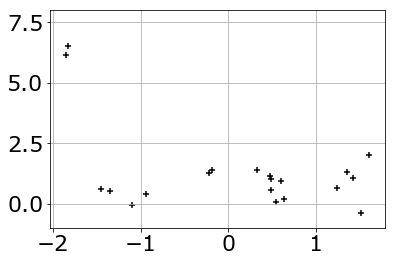

In [3]:
X, y = get_poly_data()
plot_more_poly_data(X, y)

Теперь посмотрим, как различные полиномы могут репрезентировать данные.

In [ ]:
plot_poly_data(X, y)

Но нужно помнить, что не всегда у нас может быть хороший набор данных. Допустим после того как мы обучили нашу модель мы собрали еще данных.  

In [ ]:
X1, y1 = get_more_poly_data()
plot_more_poly_data(X, y, X1, y1)

Теперь посмотрим на ошибку также на новых данных.

То есть, слишком сложная модель переобучается на данных. 

Для решения этой проблемы мы делим наши данные на обучающий набор и тестовый набор. Модель обучается на тестовом наборе, но окончательная оценка производится по тестовому набору. 


**Не очень наглядные картинки, надо добавить попроще и привести в противовес переобучения - недоообучение**


**Не рассказзано про метрики качества регрессии, R2, smape, MAE...,
где когда лучше применять, например если предсказываем выручку, то MSE покажет что? квадратные рубли? надо смотреть что то еще**

**Рассказать про регуляризацию, например начать с того, что при переобучении у линейной модели будут очень большие веса, 
поймем что большие веса это плохо, как сделать их меньше? Ввести регуляризацию, можно привести пример аналитического решения с ней, получить регуляризацию по Тихонову.
Можно привести пример с ошибками(бывает большой разброс и бывает смещение, что делает регуляризация? оставляет смещение и убирает разброс на сколько я помню)
Нарисовать картинки с регуляризацией (кружочек для L2, ромбик для L1, покажем что L1 еще и фичи зануляет)**

**Ничего не сказали про нормировку данных, если в модель засунуть фичи которые отличаются на порядки, хорошо это будет?**


**обучить модельку из scikit-learn**

**Повторить все что мы сделали (рассказать про пайплайн)**

# Переобучение и слишком простая модель

Как вы понимаете линейные функции не всегда могут быть использована для все данных. Например, допустим у нас есть следующий набор данных:

![alt](img\new_data.png)

Линейная регрессия может предсказать только прямую линию, но тут такое не пойдет. Нам нужно что-то по сложнее. То есть, наша модель слишком простая.

## Полиномы

Полиномом степени n называется функция $poly(X) = k_n X^n + k_{n-1} X^{n-1}  \ldots + k_1 X + k_0$. Известное вам квадратное уравнение — это полином второй степени. $quadratic(X) = k_2 X^2 + k_1 X + k_0$, или как вы привыкли его видеть: $quadratic(X) = a X^2 + b X + c$.

**Заменить картинку и рассказать прмиеры**

![alt](img\polynomes.png)

В дальнейшем мы будем использовать полиномиальную регрессию. Ее можно простым образом получить из линейной регрессии. 
Как вы уже догадались формула линейной регрессии от M параметров можно записать следующим образом:
$ f(X^{\textrm{(1-ый параметр)}}, 
    X^{\textrm{(2-ой параметр)}}, 
    \cdots, 
    X^{\textrm{(M-1-ый параметр)}}, 
    X^{\textrm{(M-ый параметр)}}) 
    = 
    k_0 + 
    k_1 X^{\textrm{(1-ый параметр)}} + 
    k_2 X^{\textrm{(2-ой параметр)}} + 
    \cdots + 
    k_{M - 1} X^{\textrm{(M-1-ый параметр)}} + 
    k_M X^{\textrm{(M-ый параметр)}}$.

Но заменив $X^{\textrm{(i-ый параметр)}}$ на $X^{i}$. Мы получим формулу для полинома от $X$. Напоминаю, что $X^{i}$ значит значение $X$ в степени i. То есть, мы передаем в формулу линейной регрессии $X^i$, вместо i-го параметра.

$ f(X, 
    X^2, 
    \cdots, 
    X^{M-1}, 
    X^M) = k_0 + k_1 X + k_2 X^2 + \cdots + k_{M - 1} X^{M - 1} + k_M X^{M} = poly(X)$.


Давайте получим и визуализируем новые данные.

** Картинки с переобучение. Недообучние и норм**

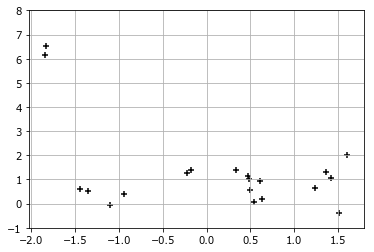

In [13]:
X, y = get_poly_data()
plot_more_poly_data(X, y)

Теперь посмотрим, как различные полиномы могут репрезентировать данные.

In [18]:
plot_poly_data(X, y)

interactive(children=(IntSlider(value=1, description='Степень полинома', max=19, min=1), Output()), _dom_class…

Но нужно помнить, что не всегда у нас может быть хороший набор данных. Допустим после того как мы обучили нашу модель мы собрали еще данных.  

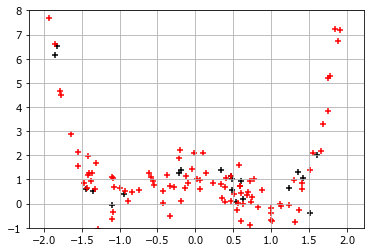

In [15]:
X1, y1 = get_more_poly_data()
plot_more_poly_data(X, y, X1, y1)

Теперь посмотрим на ошибку также на новых данных.

In [16]:
plot_poly_data(X, y, X1, y1)

interactive(children=(IntSlider(value=1, description='Степень полинома', max=19, min=1), Output()), _dom_class…

То есть, слишком сложная модель переобучается на данных. 

Для решения этой проблемы мы делим наши данные на обучающий набор и тестовый набор. Модель обучается на тестовом наборе, но окончательная оценка производится по тестовому набору. 


**Не очень наглядные картинки, надо добавить попроще и привести в противовес переобучения - недоообучение**

**Не рассказзано про метрики качества регрессии, R2, smape, MAE...,
где когда лучше применять, например если предсказываем выручку, то MSE покажет что? квадратные рубли? надо смотреть что то еще**

**Рассказать про регуляризацию, например начать с того, что при переобучении у линейной модели будут очень большие веса, 
поймем что большие веса это плохо, как сделать их меньше? Ввести регуляризацию, можно привести пример аналитического решения с ней, получить регуляризацию по Тихонову.
Можно привести пример с ошибками(бывает большой разброс и бывает смещение, что делает регуляризация? оставляет смещение и убирает разброс на сколько я помню)
Нарисовать картинки с регуляризацией (кружочек для L2, ромбик для L1, покажем что L1 еще и фичи зануляет)**

**Ничего не сказали про нормировку данных, если в модель засунуть фичи которые отличаются на порядки, хорошо это будет?**

**обучить модельку из scikit-learn**

**Повторить все что мы сделали (рассказать про пайплайн)**

# Задание

1. Создать полиномиальные признаки
1. Сделать полиномиальную функцию
2. Сделать функцию ошибки
3. Рассчитать градиент
4. Реализовать градиентный спуск
Задания следует делать одно за другим.

Для начала запустим следующую ячейку, которая визуализирует наши данные.

In [228]:
X, y = get_data()    # Загружаем данные в X и y

##### Создать квадратичные признаки 
На вход функции передается вектор значений признаков X размера Nx1. Функция должна возвращать матрицу  размера N x m+1 c полиномиальными признаками из вектора X следуюзего вида:
   \begin{equation*}
    \mathbf{X} = \begin{pmatrix}
    1 & x_1 & x_1^2 &\dots & x_1^m\\
    1 & x_2 & x_2^2 &\dots & x_2^m \\
    \cdots \\
    1& x_N & x_N^2 &\dots & x_n^m
    \end{pmatrix}
    \end{equation*}
    
Подсказка: использовать функцию hstack из библиотеки numpy.

In [229]:
def creat_polinom_features(X, m):
    X_m = np.ones_like(X)
    # Напоминаю, что код нужно писать в области между звездочками. 
    #***********************************************************************
    for i in range(1, m+1):
        X_m = np.hstack((X_m, X**i))
    #***********************************************************************
    return X_m

m=3
X_m = creat_polinom_features(X.reshape(-1,1), m)

##### Реализовать линейную функцию вида $y = \theta_0 + \theta_1 x + \theta_2 x^2 +... + \theta_m x^m$ в матричном виде. 
   На вход функции передается вектор значений коэффициента $\Theta$ размера m+1x1, и матрица  $\mathbf{X}$ размера Nxm+1 с квадратичными признаками полученная предыдущей функцией. Ваша задача  вернуть вектор-столбец предсказаний $\mathbf{y}$ размера Nx1 полученный перемножением матрицы $X$ и $\Theta$:
\begin{equation*}
y = X\Theta
\end{equation*}


In [230]:
def polinom_function(theta, X_m):
    y = np.zeros(X.shape[0])

    #***********************************************************************  
    y = np.dot(X_m, theta)
    #***********************************************************************

    return y

##### Реализовать функцию потерь  MAE $J(\Theta) = \frac{1}{N}\sum_{i=0}^{N}{|\hat{y_i} - y_i|}= \frac{1}{N} \sum_{i=0}^{N}{|f(X_i, \Theta) - y_i|}$

На вход функции передается вектор коэффициентов $\Theta$, и матрица признаков $\mathbf{X}$ размера Nxm+1 и вектор-столбец $\mathbf{y}$ c реальными значениями, размера Nx1. Функция должна возвращать действительное число равное $J(\Theta)$.  В библиотеки numpy есть функция модуля absolute, она тебе поможет.

In [231]:
def loss_function(theta, X_m, y):
    # Ты можешь использовать функцию polinon_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один вектор из другого, а также помни что,
    # ты можешь почленно вводить в степень вектор. 
    
    # Результат функции потерь должен быть записан в переменную J
   
    
    N = X.shape[0]       # получаем размер вектора столбца
    J = 0

    #***********************************************************************
    y_pred = polinom_function(theta, X_m)
    J = sum(np.absolute(y_pred - y))/N

    #***********************************************************************

    return J

##### Реализовать подсчет градиента  $J'(\Theta)$.
На вход функции передается вектор коэффициентов $\Theta$, и матрица признаков $\mathbf{X}$ размера Nxm+1 и вектор-столбец $\mathbf{y}$ c реальными значениями размера Nx1. Функция должна возвращать вектор градиент функции потерь MAE $J'(\Theta)$ в точке $\theta_0 ... \theta_m$.   В общем случае производная от $|x|$ не определена в точке 0, во всех остальных случаях ее можно определть, как $|x|/x$.
В нашем случае мы можем доопределить производную от |x| в нуле значением 0. Тогда она совпадет с функцией знака:
\begin{equation*}
 sign(x) = 
 \begin{cases}
   1 &\text{x > 0}\\
   0 &\text{x = 0}\\
   -1 &\text{x < 0}
 \end{cases}
\end{equation*}

Теперь мы можем посчитать градиент функции потерь:  
\begin{equation*}
\frac{\partial J(\Theta)}{\partial \theta_j} = \frac{1}{N} \sum_{i=1}^{N} sign(f_i(X_i, \Theta) - y_i) X_{ij}  = \frac{1}{N} \sum_{i=1}^{N} sign(X\Theta_i - y_i) X_{ij}
\end{equation*}

\begin{equation*}
J'(\Theta) = 
 \begin{cases}
   \frac{1}{N} \sum_{i=1}^{N} sign(X\Theta_i - y_i)X_{i0}\\
   \frac{1}{N} \sum_{i=1}^{N} sign(X\Theta_i - y_i)X_{i1}\\
   \cdots\\
   \frac{1}{N} \sum_{i=1}^{N} sign(X\Theta_i - y_i)X_{im}\\
 \end{cases}
\end{equation*}

В библиотеке numpy есть функция sign, которя считает функцию знака для всех элементолв вектора.

In [232]:
def gradient_function(theta, X_m, y):
    # Ты можешь использовать функцию polinom_function из предыдущего задания
    # Для того, что бы найти значение f(X)
    # Не бойся создавать новые переменные. 
    # Помни что ты можешь вычитать один из другого, а также помни что,
    # ты можешь почленно перемножать вектора вектор. 
    
    # Результат функции потерь должен быть записан в вектор grad
    N, m = X_m.shape       # получаем размер вектора столбца
    grad = np.zeros(m)
    
    #***********************************************************************
    y_pred = polinom_function(theta, X_m)
    for j in range(m):
        grad[j] = np.dot(np.sign(y_pred - y),X_m[:,j])/N
                       
    #***********************************************************************
    return grad
   
#check_gradient_function(gradient_function)

##### Финишная прямая. Пора реализовать алгоритм градиентного спуска. 
На вход функции передается начальный вектор $\mathbf{\Theta}$ размера m+1x1, матрица признаков $\mathbf{X}$ размера Nxm+1 и вектор-столбец $\mathbf{y}$ c реальными значениями размера Nx1, значение коэффициента альфа $\alpha$ и число $iters$ равное количеству итераций в алгоритме. 
Сам алгоритм мы будем использовать в следующем виде
* Повторить $iters$ раз:
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\Theta = \Theta - \alpha \cdot J'(\Theta)$

In [233]:
def gradient_descent(theta_init, X_m, y, alpha, iters):
    # Лучше всего использовать функцию gradient_function для 
    # нахождения градиента, чем пересчитывать его еще раз
    
    # И еше я прошу перед тем как изменить значение theta, сохранять в массиве theta_old.
    #предыдущий вектор
    # Например, i это счетчик цикла.
    # Тогда вектор theta можно сохранить как theta_old[i,:] = theta
        
    theta = theta_init
    N, m = X_m.shape
    theta_old = np.zeros((iters, m))

    #***********************************************************************

    for i in range (0, iters):
        theta_old[i, :] = theta
        theta = theta - (alpha * gradient_function(theta, X_m, y))
        

    #***********************************************************************

    return theta, theta_old
    
#check_gradient_descent(gradient_descent)
